In [1]:
#Import all essential libraries.

import pandas as pd 
import numpy as np 
import tensorflow as tf  
import matplotlib.pyplot as plt

#Import additional libraries needed for creating neural network.

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
#Preparing the data for representation and adding labels.

dataset = pd.read_csv('spam.csv',encoding='latin-1')
dataset = dataset.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
dataset = dataset.rename(columns={"v1":'Type', "v2":'Content'})

tags = dataset["Type"]
texts = dataset["Content"]

dataset['Type'].unique()
label = {'spam': 1,'ham': 0}
dataset['Type'].replace(label, inplace=True)

In [4]:
#Preparing the data to be trained.
#Training the text and tag data.

training_size = int(len(texts) * 0.8)

training_texts = texts[0:training_size]
testing_texts = texts[training_size:]

training_tags = tags[0:training_size]
testing_tags = tags[training_size:]

training_tags_final = np.array(training_tags)
testing_tags_final = np.array(testing_tags)

In [5]:
#Tokenize the dataset

vocab_size = 1000
embedding_dim = 16
max_length = 100

trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_texts)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_texts)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_texts)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)

In [6]:
#Creatibg the Model for the data

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#Present the table of model data

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           16000     
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 6)                 9606      
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 25,613
Trainable params: 25,613
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Using the epoch funtion to train the data.

num_epochs = 50
history=model.fit(padded, training_tags_final, epochs=num_epochs, validation_data=(testing_padded, testing_tags_final))

Epoch 1/50
140/140 [==============================] - 1s 4ms/step - loss: 5.4273e-04 - accuracy: 0.9998 - val_loss: 0.1767 - val_accuracy: 0.9767
Epoch 2/50
140/140 [==============================] - 0s 3ms/step - loss: 5.7431e-04 - accuracy: 0.9996 - val_loss: 0.1821 - val_accuracy: 0.9740
Epoch 3/50
140/140 [==============================] - 0s 3ms/step - loss: 5.6413e-04 - accuracy: 0.9996 - val_loss: 0.1800 - val_accuracy: 0.9776
Epoch 4/50
140/140 [==============================] - 0s 3ms/step - loss: 6.1365e-04 - accuracy: 0.9996 - val_loss: 0.1875 - val_accuracy: 0.9740
Epoch 5/50
140/140 [==============================] - 1s 5ms/step - loss: 5.4907e-04 - accuracy: 0.9996 - val_loss: 0.1796 - val_accuracy: 0.9758
Epoch 6/50
140/140 [==============================] - 1s 4ms/step - loss: 4.7865e-04 - accuracy: 0.9998 - val_loss: 0.1880 - val_accuracy: 0.9758
Epoch 7/50
140/140 [==============================] - 1s 4ms/step - loss: 5.1683e-04 - accuracy: 0.9998 - val_loss: 0.1894 -

In [14]:
#Listing all the data history.

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


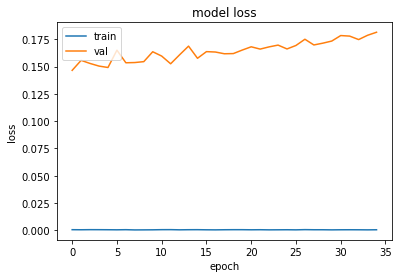

In [15]:
#Recalling and determining the accuracy of the program.

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [17]:
#Presenting the data.

dataset = pd.read_csv('output_spam.csv',encoding='latin-1')
dataset = dataset.rename(columns={"ï»¿":'labels', "text":'texts'})
dataset.head()

,labels,texts
0,1,Feel Yourself That You Are Always Happy.. Slow...
1,2,staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
2,3,Send me yetty's number pls.
3,4,Hey so this sat are we going for the intro pil...
4,5,I got it before the new year cos yetunde said ...


In [19]:
#Displaying messages.

messages = dataset['texts'].astype(str)
print(messages)

#Ming of sequences.

padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(messages)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

classes = model.predict(fakes_padded)

0     Feel Yourself That You Are Always Happy.. Slow...
1     staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
2                           Send me yetty's number pls.
3     Hey so this sat are we going for the intro pil...
4     I got it before the new year cos yetunde said ...
5     Hey we can go jazz power yoga hip hop kb and y...
6     Hey mate. Spoke to the mag people. Weâ°ÃÃ·re...
7                                Morning only i can ok.
8                                  Wat time Ã_ finish?
9                 Shant disturb u anymore... Jia you...
10    4mths half price Orange line rental & latest c...
11    Your opinion about me? 1. Over 2. Jada 3. Kusr...
12    MOON has come to color your dreams, STARS to m...
13    You are a winner U have been specially selecte...
14    Unless it's a situation where YOU GO GURL woul...
15    Awww dat is sweet! We can think of something t...
16                              Bring tat cd don forget
17    Single line with a big meaning::::: \Miss 

In [20]:
#Classification of spam messages in the data.

for x in range(len(messages)):
  print(messages[x])
  print(classes[x])
  print('\n')

Feel Yourself That You Are Always Happy.. Slowly It Becomes Your Habit &amp; Finally It Becomes Part Of Your Life.. Follow It.. Happy Morning &amp; Have A Happy Day:)
[1.9495945e-23]


staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
[6.164149e-08]


Send me yetty's number pls.
[2.6905875e-11]


Hey so this sat are we going for the intro pilates only? Or the kickboxing too? 
[1.9410972e-12]


I got it before the new year cos yetunde said she wanted to surprise you with it but when i didnt see money i returned it mid january before the  &lt;#&gt; day return period ended.
[1.5009595e-16]


Hey we can go jazz power yoga hip hop kb and yogasana 
[1.8413131e-12]


Hey mate. Spoke to the mag people. Weâ°ÃÃ·re on.  the is deliver by the end of the month. Deliver on the 24th sept. Talk later. 
[1.8874266e-14]


Morning only i can ok.
[1.4585403e-14]


Wat time Ã_ finish?
[2.8013756e-09]


Shant disturb u anymore... Jia you...
[2.3601965e-09]


4mths half price Orange line rental & latest c